In [18]:
sql = """select 
  date, 
  category, 
  sum(value) as value
from mortgages 
where strftime('%Y', date) > "2008" and date <= (
  select max(date) as max_date from mortgages where institute = 'bank' union
  select max(date) as max_date from mortgages where institute = 'pension' union
  select max(date) as max_date from mortgages where institute = 'other' order by max_date limit 1)  
group by date, category 
order by date, category"""

In [19]:
from urllib.parse import urlencode
import pandas
url = "https://sedlabanki-housing-mtckiezzpq-lz.a.run.app/housing.csv?" + urlencode({"sql": sql})
series = pandas.read_csv(url, parse_dates=['date'])

<Figure size 840x560 with 0 Axes>

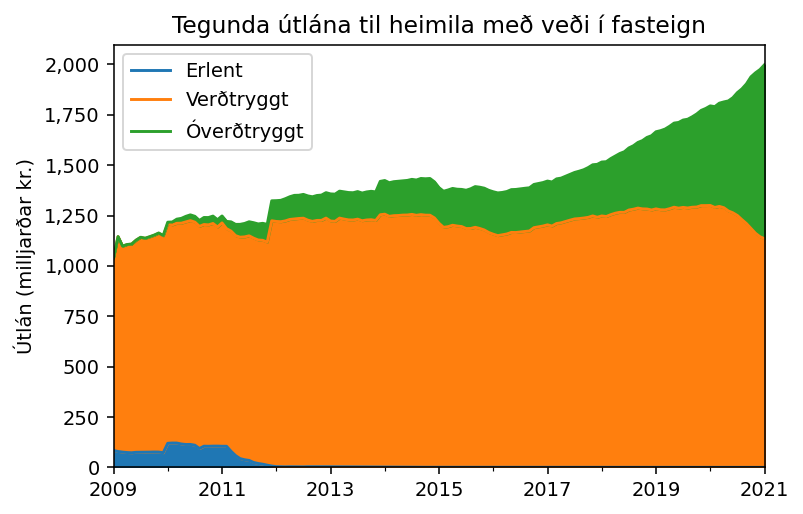

In [24]:
from matplotlib.ticker import FuncFormatter

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['figure.dpi'] = 140

df = series.pivot(index="date", columns="category", values="value")
# df = df.divide(df.sum(axis=1), axis=0)
fig = plt.figure()
ax = df.plot.area(stacked=True)
plt.title('Tegunda útlána til heimila með veði í fasteign')
ax.legend(['Erlent', 'Verðtryggt', 'Óverðtryggt'])
ax.set_ylabel("Útlán (milljarðar kr.)")
ax.set_xlabel(None)
ax.yaxis.set_major_formatter(FuncFormatter(lambda y, _: f'{y / 1_000_000_000:,.0f}')) 